In [4]:
import sys

sys.path.append("../mcts_dl")

In [18]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [19]:
from utils.utils import ReadMapFromMovingAIFile, Map

In [20]:
map_name = "Berlin_0_1024"
taskMap = ReadMapFromMovingAIFile(f"../data/{map_name}.map")

In [34]:
def Draw(gridMap : Map):
    k = 1
    hIm = gridMap.height * k
    wIm = gridMap.width * k
    im = Image.new('RGB', (wIm, hIm), color = 'white')
    draw = ImageDraw.Draw(im)
    for i in range(gridMap.height):
        for j in range(gridMap.width):
            if(gridMap.cells[i][j] == 1):
                draw.rectangle((j * k, i * k, (j + 1) * k - 1, (i + 1) * k - 1), fill=( 70, 80, 80 ))
    
    return np.asarray(im)

In [44]:
def Draw(gridMap : Map):
    hIm = gridMap.height 
    wIm = gridMap.width
    im = np.ones((hIm, wIm))
    for i in range(gridMap.height):
        for j in range(gridMap.width):
            if(gridMap.cells[i][j] == 1):
                im[i][j] = 0
    return np.asarray(im) * 255

In [45]:
image_map = Draw(taskMap)

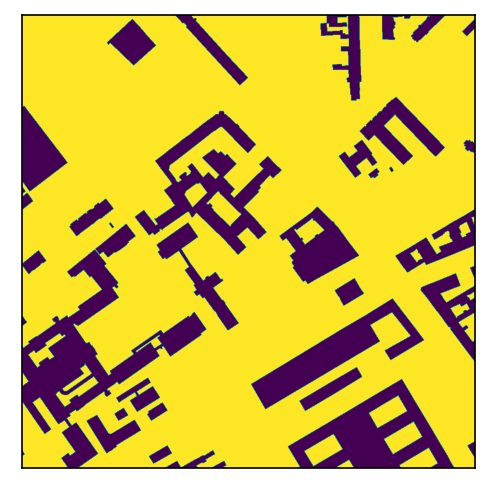

In [46]:
fig, ax = plt.subplots(dpi=150)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(image_map)

In [70]:
window_size = 100

In [73]:
x, y = 330, 348

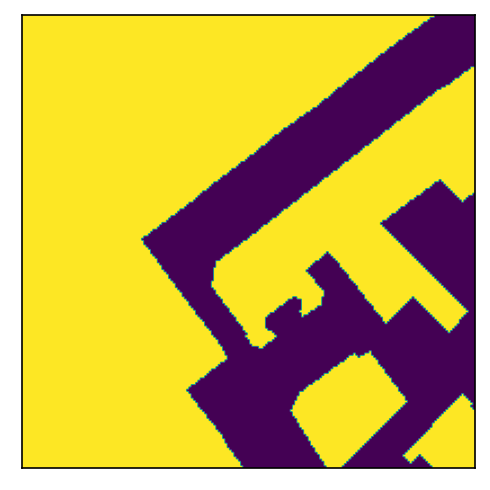

In [75]:
fig, ax = plt.subplots(dpi=150)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(image_map[x-window_size:x+window_size+1, y-window_size:y+window_size+1])

In [82]:
next_pos = []
for i in range(-1, 2):
    for j in range(-1, 2):
        if i == 0 and j == 0:
            continue
        next_pos.append((x+i, y+j))

In [83]:
len(next_pos)

8

In [84]:
next_pos

[(329, 347),
 (329, 348),
 (329, 349),
 (330, 347),
 (330, 349),
 (331, 347),
 (331, 348),
 (331, 349)]